# Linear Regrssion   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


data = pd.read_csv("../data/Advertising.csv", index_col="Unnamed: 0")

data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Tittar vi på fördelningen för Newspaper kan vi se att det är konstig fördling i kvartilerna, det hoppar mycket mellan varje kvartil. 

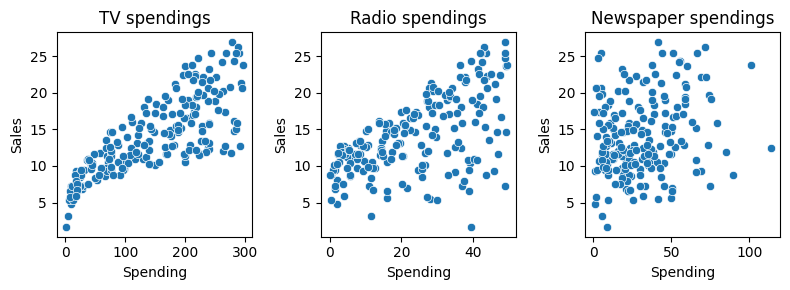

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

number_features = data.shape[1] - 1 

fig, ax = plt.subplots(1, number_features, figsize=(8, 3), dpi=100)


for i, feature in enumerate(data.columns[:-1]):
    sns.scatterplot(data=data, x=feature, y="Sales", ax=ax[i])
    ax[i].set(xlabel="Spending", title=f"{feature} spendings")

fig.tight_layout()  


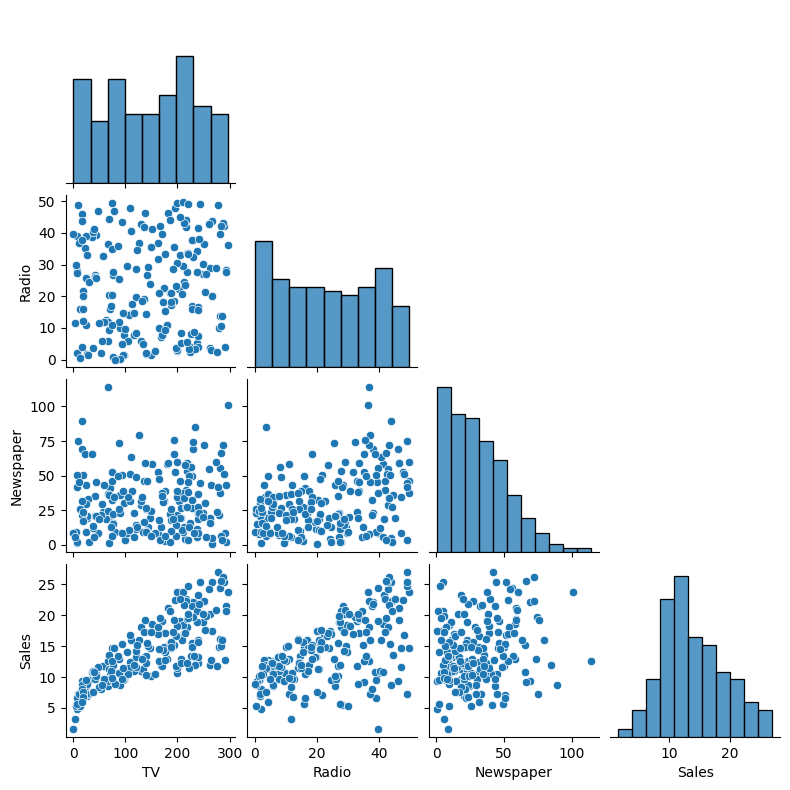

In [5]:
ax = sns.pairplot(data, corner=True, height=2)


Intercept beta0: 7.0326
Intercept beta1: 0.0475


[Text(0.5, 1.0, 'TV advertisement linear regression'),
 Text(0.5, 0, 'Thousands dollars'),
 Text(0, 0.5, 'Sales thousands units')]

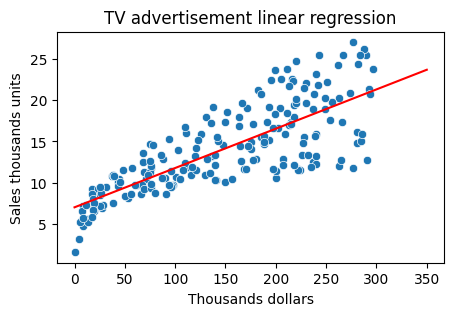

In [6]:
X, y = data["TV"], data["Sales"]

beta_1, beta_0 = np.polyfit(X, y, deg=1)

y_hat = lambda x: beta_0 + beta_1*x

print(f"Intercept beta0: {beta_0:.4f}")
print(f"Intercept beta1: {beta_1:.4f}")

spend = np.linspace(0, 350)

fig, ax = plt.figure(figsize=(5,3), dpi=100), plt.axes()

sns.scatterplot(data=data, x="TV", y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set(
    title="TV advertisement linear regression",
    xlabel="Thousands dollars",
    ylabel="Sales thousands units",
)

<Axes: xlabel='TV', ylabel='Sales'>

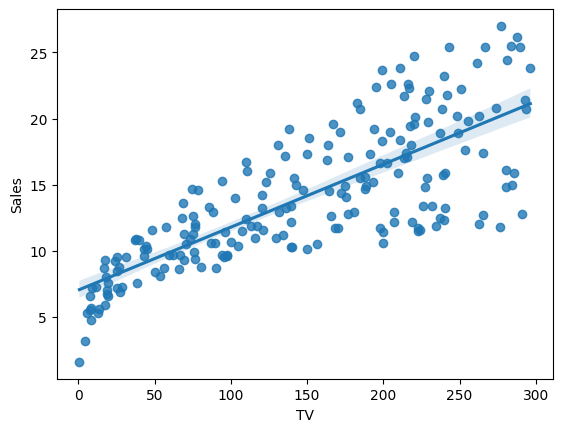

In [7]:
sns.regplot(x=X, y=y)

In [8]:
from sklearn.linear_model import LinearRegression

# data = pd.read_csv("../data/Advertising.csv", index_col=0)
X, y = data.drop("Sales", axis="columns"), data["Sales"]

X.insert(0, "Intercept", 1) 

model = LinearRegression()
beta = model.fit(X, y)

test_sample = [[1, 230.1, 37.8, 69.2]]
y_hat = model.predict(test_sample)

print(f"TV: $230.1k, Radio:$37.8, Newspaper:69.2 predict {y_hat[0]:.1f}")

TV: $230.1k, Radio:$37.8, Newspaper:69.2 predict 20.5


f:\AI-24-programering\Python-programing-Hannes-Fredriksson\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
train_fraction = int(len(data)*0.7)

train = data.sample(n=train_fraction, random_state=42, replace=True)
val = data.drop(train.index)

X_train, y_train = train.drop("Sales", axis="columns"), train["Sales"]
X_val, y_val = val.drop("Sales", axis="columns"), val["Sales"]

X_train.insert(0, "Intercept", 1)
X_val.insert(0, "Intercept", 1)

for dataset in ["X_train", "X_val", "y_train", "y_val"]:
    print(f"Shape of {dataset}: {eval(dataset).shape}")



,Intercept,TV,Radio,Newspaper
103,1,280.2,10.1,21.4
180,1,165.6,10.0,17.6
93,1,217.7,33.5,59.0
15,1,204.1,32.9,46.0
107,1,25.0,11.0,29.7
...,...,...,...,...
175,1,222.4,3.4,13.1
131,1,0.7,39.6,8.7
1,1,230.1,37.8,69.2
5,1,180.8,10.8,58.4


In [10]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

$MAE = \frac{1}{m}\sum^{m}_{i = 1} |y_i - \hat{y_i}|$ Mahattan distsnce, taxi cab. 

In [12]:
# Kolla lektion video och gör anteckningar om statistikan. 

model = LinearRegression()

model.fit(X_train, y_train)
n = len(y_val)
y_hat = model.predict(X_val)

MAE = np.divide(1, n) * np.sum(np.abs(y_val - y_hat))

MSE = np.divide(1, n) * np.sum(np.square(y_val - y_hat))

RMSE = np.sqrt(MSE)

RSE = np.sqrt(np.divide(1, n-X_val.shape[1]-2) * np.sum(np.square(y_val - y_hat)))

print (f" MAE {MAE}\n MSE {MSE}\n RMSE {RMSE}\n RSE {RSE}")

 MAE 1.4473314599395826
 MSE 3.2542290892355856
 RMSE 1.8039481947205651
 RSE 1.8578092191190685
